<a href="https://colab.research.google.com/github/RAFS20/Time-Series/blob/main/RNN%2C_LSTM%2C_GRU_y_AutoArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
105/105 [==============================] - 2s 4ms/step - loss: 0.1922
Epoch 2/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 3/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 4/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 5/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 6/10
105/105 [==============================] - 0s 4ms/step - loss: 9.9168e-04
Epoch 7/10
105/105 [==============================] - 0s 4ms/step - loss: 9.5267e-04
Epoch 8/10
105/105 [==============================] - 0s 4ms/step - loss: 9.4875e-04
Epoch 9/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 10/10
4/4 [==============================] - 0s 5ms/step


RNN Metrics:
MAE: 0.0392
RMSE: 0.0519
R^2: 0.9042
MAPE: 8.2352%
Test Loss: 0.0027
----------------------------------------
Epoch 1/10
105/105 [==============================] - 3s 7ms/step - loss: 0.1059
Epoch 2/10
105/105 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 3/10
105/105 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 4/10
105/105 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 5/10
105/105 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 6/10
105/105 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 7/10
105/105 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 8/10
105/105 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 9/10
105/105 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 10/10
4/4 [==============================] - 0s 6ms/step


LSTM Metrics:
MAE: 0.0561
RMSE: 0.0682
R^2: 0.8344
MAPE: 8.0706%
Test Loss: 0.0047
----------------------------------------
Epoch 1/10
105/105 [==============================] - 3s 7ms/step - loss: 0.2341
Epoch 2/10
105/105 [==============================] - 1s 7ms/step - loss: 0.0011
Epoch 3/10
105/105 [==============================] - 1s 7ms/step - loss: 9.5329e-04
Epoch 4/10
105/105 [==============================] - 1s 7ms/step - loss: 9.5764e-04
Epoch 5/10
105/105 [==============================] - 1s 7ms/step - loss: 8.3772e-04
Epoch 6/10
105/105 [==============================] - 1s 7ms/step - loss: 8.7793e-04
Epoch 7/10
105/105 [==============================] - 1s 7ms/step - loss: 7.9087e-04
Epoch 8/10
105/105 [==============================] - 1s 7ms/step - loss: 8.5458e-04
Epoch 9/10
105/105 [==============================] - 1s 7ms/step - loss: 8.2292e-04
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
GRU Metrics:
MAE: 0.0480
RMSE: 0.0585
R^2: 0.8782
MAPE: 

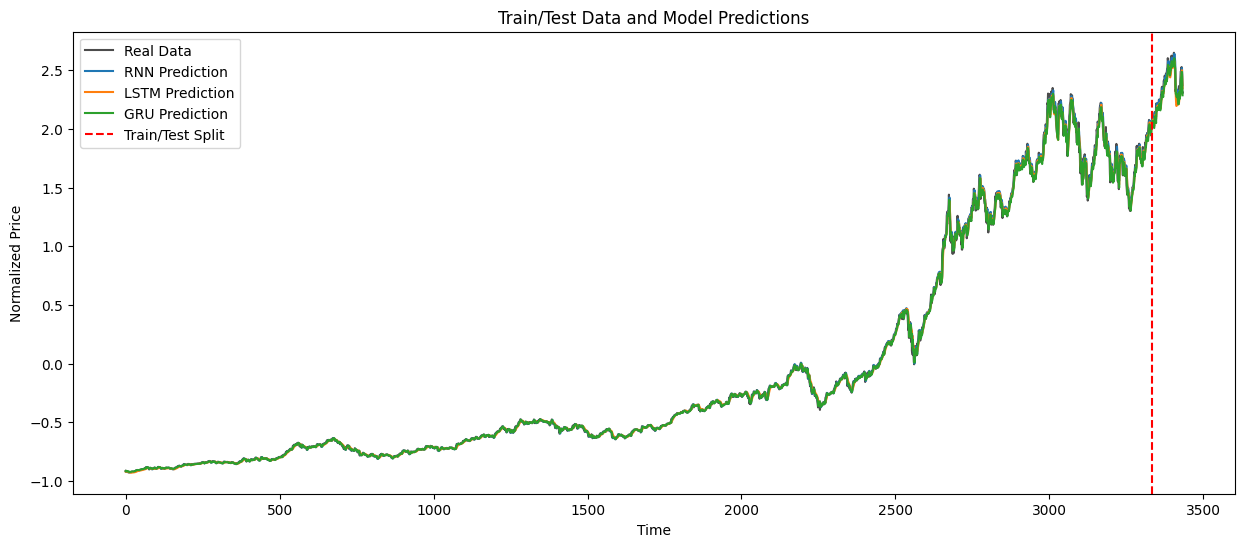

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Función para normalizar datos
def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

# Función para crear secuencias de datos
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Función modificada para dividir datos con test set siendo los últimos 30 días
def split_data(X, y, num_days_test=30):
    test_size = num_days_test
    train_size = len(X) - test_size
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Función para crear y compilar modelos
def build_model(model_type, seq_length, num_units):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'GRU':
        model.add(GRU(num_units, activation='relu', input_shape=(seq_length, 1)))
    else:
        raise ValueError("Model type must be 'RNN', 'LSTM', or 'GRU'")
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
    predictions = model.predict(X_test)
    loss = model.evaluate(X_test, y_test, verbose=0)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    return history.history['loss'], loss, mae, rmse, r2, mape

# Función para visualizar conjuntos de datos y predicciones
def plot_data_and_predictions(models, model_names, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(15, 6))

    # Graficar conjunto de entrenamiento y prueba
    total_data = np.concatenate((y_train, y_test), axis=0)
    plt.plot(total_data, label='Real Data', color='black', alpha=0.7)

    # Graficar predicciones de entrenamiento
    for i, model in enumerate(models):
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        total_pred = np.concatenate((train_pred, test_pred), axis=0)
        plt.plot(total_pred, label=f'{model_names[i]} Prediction')

    plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
    plt.title('Train/Test Data and Model Predictions')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'
seq_length = 10
num_units = 50
num_epochs = 10
batch_size = 32

# Descargar y normalizar datos
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
normalized_prices = normalize_data(closing_prices)

# Crear secuencias y dividir datos
X, y = create_sequences(normalized_prices, seq_length)
X_train, X_test, y_train, y_test = split_data(X, y, 100)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Crear modelos
model_types = ['RNN', 'LSTM', 'GRU']
models = [build_model(model_type, seq_length, num_units) for model_type in model_types]

# Entrenar y evaluar modelos
losses = []
test_losses = []
mae_values = []
rmse_values = []
r2_values = []
mape_values = []

for i, model in enumerate(models):
    loss, test_loss, mae, rmse, r2, mape = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size)
    losses.append(loss)
    test_losses.append(test_loss)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    mape_values.append(mape)

    # Imprimir métricas
    print(f'{model_types[i]} Metrics:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'Test Loss: {test_loss:.4f}')
    print('-' * 40)

# Visualizar conjuntos de datos y predicciones
plot_data_and_predictions(models, model_types, X_train, X_test, y_train, y_test)


AutoARIMA Metrics:
MAE: 0.2561
RMSE: 0.2975
R^2: -2.1457
MAPE: 10.4651%
----------------------------------------
4/4 [==============================] - 0s 4ms/step


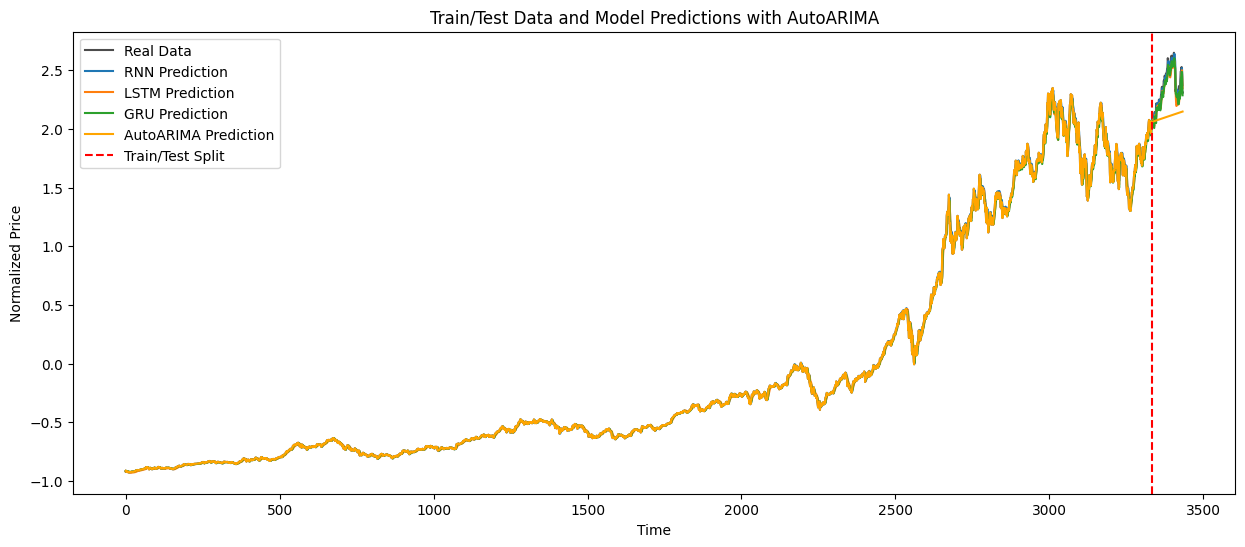

In [ ]:
from pmdarima.arima import auto_arima

def autoarima_forecast(train_data, test_data, seasonal=False):
    model = auto_arima(train_data, seasonal=seasonal, suppress_warnings=True)
    predictions = model.predict(n_periods=len(test_data))
    return predictions
# Ajustar modelo AutoARIMA y realizar predicciones
autoarima_predictions = autoarima_forecast(y_train.flatten(), y_test.flatten())

# Calcular métricas para AutoARIMA
autoarima_mae = mean_absolute_error(y_test, autoarima_predictions)
autoarima_rmse = np.sqrt(mean_squared_error(y_test, autoarima_predictions))
autoarima_r2 = r2_score(y_test, autoarima_predictions)
autoarima_mape = np.mean(np.abs((y_test - autoarima_predictions) / y_test)) * 100

# Imprimir métricas de AutoARIMA
print('AutoARIMA Metrics:')
print(f'MAE: {autoarima_mae:.4f}')
print(f'RMSE: {autoarima_rmse:.4f}')
print(f'R^2: {autoarima_r2:.4f}')
print(f'MAPE: {autoarima_mape:.4f}%')
print('-' * 40)

# Añadir AutoARIMA a la comparación
model_types.append('AutoARIMA')
models.append('AutoARIMA')  # Este es solo un marcador de posición
mae_values.append(autoarima_mae)
rmse_values.append(autoarima_rmse)
r2_values.append(autoarima_r2)
mape_values.append(autoarima_mape)

# Actualizar la función de visualización para incluir AutoARIMA
def plot_data_and_predictions_with_autoarima(models, model_names, X_train, X_test, y_train, y_test, autoarima_predictions):
    plt.figure(figsize=(15, 6))
    total_data = np.concatenate((y_train, y_test), axis=0)
    plt.plot(total_data, label='Real Data', color='black', alpha=0.7)
    total_pred_autoarima = np.concatenate((y_train, autoarima_predictions), axis=0)

    for i, model in enumerate(models):
        if model != 'AutoARIMA':
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            total_pred = np.concatenate((train_pred, test_pred), axis=0)
            plt.plot(total_pred, label=f'{model_names[i]} Prediction')
        else:
            plt.plot(total_pred_autoarima, label='AutoARIMA Prediction', color='orange')

    plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
    plt.title('Train/Test Data and Model Predictions with AutoARIMA')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

# Visualizar conjuntos de datos y predicciones con AutoARIMA
plot_data_and_predictions_with_autoarima(models, model_types, X_train, X_test, y_train, y_test, autoarima_predictions)
